# Table link
### 1. [pandas](#pandas)
### 2. [numpy](#numpy)

## pandas

In [224]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

* data url:https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv

### data 가져와서 dataframe으로 만들기

In [2]:
df = pd.read_csv('chipotle.tsv', delimiter='\t')

In [3]:
df.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


### data 갯수 가져오기

In [4]:
len(df)

4622

### data 컬럼 조회하기

In [8]:
df.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

### 가장 많이 주문한 아이템 가져오기 

In [40]:
df.groupby('item_name')[['order_id', 'quantity']].sum().sort_values(by='quantity').iloc[-1:]

,order_id,quantity
item_name,,
Chicken Bowl,713926,761


### 총 얼마나 많은 아이템이 팔렸는가?

In [34]:
df['quantity'].sum()

4972

### item price 를 float 로 변경하기

In [39]:
df['item_price'] = df['item_price'].apply(lambda x: x[1:]).astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            4622 non-null   int64  
 1   quantity            4622 non-null   int64  
 2   item_name           4622 non-null   object 
 3   choice_description  3376 non-null   object 
 4   item_price          4622 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 180.7+ KB


### 총 매출액 산출하기 (소수점 2째 자리까지)

In [44]:
total_revenue = df['item_price'].sum()
print(f'Revenue was: ${total_revenue}')

Revenue was: $34500.16


### 총 주문량 계산하기

In [161]:
# CASE 1.
# order_id가 같고 item_name이 같은 주문들에 대하여
# 마지막 주문(수정사항이 더 이상 발생하지 않는 최종 주문)만 남기고 중복 삭제

df_dedup_case1 = df.drop_duplicates(subset=['order_id', 'item_name'], keep='last')
print(len(df) - len(df_dedup_case1)) # 330개의 중복행 삭제되었음
print(df_dedup_case1.groupby('order_id')['quantity'].sum().sum()) # total item sold = 4621

330
4621


In [162]:
# CASE 2.
# order_id에 대하여 무조건 최종 주문만을 남겨서 계산

df_dedup_case2 = df.drop_duplicates(subset=['order_id'], keep='last')
print(len(df) - len(df_dedup_case2)) # 2788개의 중복행 삭제되었음
print(df_dedup_case2.groupby('order_id')['quantity'].sum().sum()) # total item sold = 1992

2788
1992


### 주문별 평균 매출액 산출하기 (소수점 2째 자리까지)

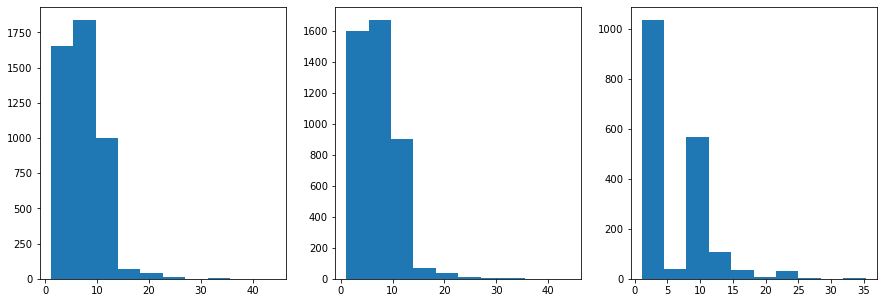

In [156]:
fig, axes = plt.subplots(1,3, figsize=(15, 5))
dfs = [df, df_dedup_case1, df_dedup_case2]
plots = [axes[i].hist(data['item_price']) for (i, data) in enumerate(dfs)]

In [164]:
# 중복값 처리하지 않은 데이터
df.groupby('order_id')[['quantity', 'item_price']].sum().mean().map(lambda x: round(x, 2))

quantity       2.71
item_price    18.81
dtype: float64

In [165]:
# 중복값 처리 데이터 - CASE 1
df_dedup_case1.groupby('order_id')[['quantity', 'item_price']].sum().mean().map(lambda x: round(x, 2))

quantity       2.52
item_price    17.27
dtype: float64

In [166]:
# 중복값 처리 데이터 - CASE 2
df_dedup_case2.groupby('order_id')[['quantity', 'item_price']].sum().mean().map(lambda x: round(x, 2))

quantity      1.09
item_price    6.13
dtype: float64

### 팔린 item 수

In [168]:
df['item_name'].value_counts()

Chicken Bowl                             726
Chicken Burrito                          553
Chips and Guacamole                      479
Steak Burrito                            368
Canned Soft Drink                        301
Steak Bowl                               211
Chips                                    211
Bottled Water                            162
Chicken Soft Tacos                       115
Chicken Salad Bowl                       110
Chips and Fresh Tomato Salsa             110
Canned Soda                              104
Side of Chips                            101
Veggie Burrito                            95
Barbacoa Burrito                          91
Veggie Bowl                               85
Carnitas Bowl                             68
Barbacoa Bowl                             66
Carnitas Burrito                          59
Steak Soft Tacos                          55
6 Pack Soft Drink                         54
Chips and Tomatillo Red Chili Salsa       48
Chicken Cr

In [169]:
len(df['item_name'].unique())

50

### item_name과 quantity 중복 제거하고 $10 이상인 item 갯수

In [196]:
# CASE 1 dataframe
# 최소값 기준으로 $10 이상인 아이템은 존재하지 않음
(df_dedup_case1.groupby('item_name')['item_price'].min() > 10.0).sum()

0

In [186]:
# CASE 1 dataframe
# 수량 1개 기준, 10달러 이상에 판매된 이력이 존재하는 아이템은 총 25개
len(df_dedup_case1[df_dedup_case1['item_price']/df_dedup_case1['quantity'] >= 10.0]['item_name'].unique())

25

In [198]:
# CASE 2 dataframe
# 최소값 기준으로 $10 이상인 아이템은 2개
(df_dedup_case2.groupby('item_name')['item_price'].min() > 10.0).sum()

2

In [199]:
# CASE 2 dataframe
# 수량 1개 기준, 10달러 이상에 판매된 이력이 존재하는 아이템은 총 24개
len(df_dedup_case2[df_dedup_case2['item_price']/df_dedup_case2['quantity'] >= 10.0]['item_name'].unique())

24

In [200]:
# CASE 3 dataframe (item_name, quantity 기준 중복 제거)
# 최소값 기준으로 $10 이상인 아이템은 7개
df_dedup_case3 = df.drop_duplicates(subset=['item_name', 'quantity'], keep='last')
(df_dedup_case3.groupby('item_name')['item_price'].min() > 10.0).sum()

7

In [201]:
# CASE 3 dataframe
# 수량 1개 기준, 10달러 이상에 판매된 이력이 존재하는 아이템은 총 9개
len(df_dedup_case3[df_dedup_case3['item_price']/df_dedup_case3['quantity'] >= 10.0]['item_name'].unique())

9

In [12]:
# 정답?

12

### 위에서 생성한 dataframe에서 item_name, item_price만 선택

In [210]:
# 수량 1개에 대한 컬럼 생성
df_dedup_case1['item_unit_price'] = df_dedup_case1['item_price'] / df_dedup_case1['quantity']
df_dedup_case2['item_unit_price'] = df_dedup_case2['item_price'] / df_dedup_case2['quantity']
df_dedup_case3['item_unit_price'] = df_dedup_case3['item_price'] / df_dedup_case3['quantity']

/opt/anaconda3/envs/AI_dev/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/envs/AI_dev/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/envs/AI_dev/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

In [211]:
df_dedup_case1_in_iup = df_dedup_case1[['item_name', 'item_unit_price']]
df_dedup_case2_in_iup = df_dedup_case2[['item_name', 'item_unit_price']]
df_dedup_case3_in_iup = df_dedup_case3[['item_name', 'item_unit_price']]

,item_name,item_price
0,Chips and Fresh Tomato Salsa,2.39
1,Izze,3.39
2,Nantucket Nectar,3.39
3,Chips and Tomatillo-Green Chili Salsa,2.39
5,Chicken Bowl,10.98
6,Side of Chips,1.69
7,Steak Burrito,11.75
8,Steak Soft Tacos,9.25
10,Chips and Guacamole,4.45
11,Chicken Crispy Tacos,8.75


### 위의 dataframe을 다시 비싼 가격 순으로 정렬후 20개만 표시

In [227]:
df_dedup_case1_in_iup_top20_prices = df_dedup_case1_in_iup.sort_values(by='item_unit_price', ascending=False).drop_duplicates(subset=['item_name', 'item_unit_price'])[:20]
df_dedup_case2_in_iup_top20_prices = df_dedup_case2_in_iup.sort_values(by='item_unit_price', ascending=False).drop_duplicates(subset=['item_name', 'item_unit_price'])[:20]
df_dedup_case3_in_iup_top20_prices = df_dedup_case3_in_iup.sort_values(by='item_unit_price', ascending=False).drop_duplicates(subset=['item_name', 'item_unit_price'])[:20]

In [228]:
df_dedup_case1_in_iup_top20_prices

,item_name,item_unit_price
1326,Barbacoa Salad Bowl,11.89
749,Steak Salad Bowl,11.89
3749,Carnitas Salad Bowl,11.89
4288,Barbacoa Burrito,11.75
2629,Steak Crispy Tacos,11.75
3313,Steak Burrito,11.75
4518,Steak Bowl,11.75
1244,Carnitas Bowl,11.75
1129,Barbacoa Soft Tacos,11.75
3394,Barbacoa Bowl,11.75


In [229]:
df_dedup_case2_in_iup_top20_prices

,item_name,item_unit_price
3493,Steak Salad Bowl,11.89
2610,Carnitas Salad Bowl,11.89
1326,Barbacoa Salad Bowl,11.89
1908,Carnitas Bowl,11.75
690,Steak Bowl,11.75
2787,Barbacoa Crispy Tacos,11.75
158,Steak Burrito,11.75
2812,Steak Crispy Tacos,11.75
2986,Barbacoa Burrito,11.75
4147,Carnitas Soft Tacos,11.75


In [230]:
df_dedup_case3_in_iup_top20_prices

,item_name,item_unit_price
4239,Carnitas Salad Bowl,11.89
613,Steak Salad Bowl,11.89
4594,Barbacoa Bowl,11.75
506,Carnitas Bowl,11.75
4554,Steak Crispy Tacos,11.75
4427,Steak Bowl,11.75
4618,Steak Burrito,11.75
4611,Veggie Burrito,11.25
4468,Veggie Bowl,11.25
4572,Steak Salad Bowl,9.39


In [14]:
# 정답?

,item_name,item_price
606,Steak Salad Bowl,11.89
1229,Barbacoa Salad Bowl,11.89
1132,Carnitas Salad Bowl,11.89
7,Steak Burrito,11.75
168,Barbacoa Crispy Tacos,11.75
39,Barbacoa Bowl,11.75
738,Veggie Soft Tacos,11.25
186,Veggie Salad Bowl,11.25
62,Veggie Bowl,11.25
57,Veggie Burrito,11.25


###  위에서 얻은 dataframe을 item 이름 별로 정렬

In [233]:
df_dedup_case1_in_iup_sort_by_in = df_dedup_case1_in_iup.sort_values(by='item_name').drop_duplicates(subset=['item_name', 'item_unit_price'])
df_dedup_case2_in_iup_sort_by_in = df_dedup_case2_in_iup.sort_values(by='item_name').drop_duplicates(subset=['item_name', 'item_unit_price'])
df_dedup_case3_in_iup_sort_by_in = df_dedup_case3_in_iup.sort_values(by='item_name').drop_duplicates(subset=['item_name', 'item_unit_price'])

In [235]:
df_dedup_case1_in_iup_sort_by_in

,item_name,item_unit_price
3789,6 Pack Soft Drink,6.49
1420,Barbacoa Bowl,9.25
1383,Barbacoa Bowl,11.48
3245,Barbacoa Bowl,8.99
4510,Barbacoa Bowl,11.49
...,...,...
2156,Veggie Salad Bowl,11.25
1316,Veggie Salad Bowl,8.75
1395,Veggie Soft Tacos,8.49
1699,Veggie Soft Tacos,11.25


In [236]:
df_dedup_case2_in_iup_sort_by_in

,item_name,item_unit_price
3422,6 Pack Soft Drink,6.49
1970,Barbacoa Bowl,9.25
2749,Barbacoa Bowl,11.75
803,Barbacoa Bowl,8.99
1236,Barbacoa Bowl,11.48
...,...,...
1884,Veggie Salad Bowl,11.25
4541,Veggie Salad Bowl,8.75
2851,Veggie Soft Tacos,8.49
738,Veggie Soft Tacos,11.25


In [234]:
df_dedup_case3_in_iup_sort_by_in

,item_name,item_unit_price
4535,6 Pack Soft Drink,6.49
4594,Barbacoa Bowl,11.75
4603,Barbacoa Burrito,9.25
3321,Barbacoa Crispy Tacos,8.99
1903,Barbacoa Crispy Tacos,9.25
...,...,...
3601,Veggie Burrito,11.25
1653,Veggie Crispy Tacos,8.49
4084,Veggie Salad,8.49
4573,Veggie Salad Bowl,8.75


In [15]:
# 정답?

,item_name,item_price
298,6 Pack Soft Drink,6.49
39,Barbacoa Bowl,11.75
21,Barbacoa Burrito,8.99
168,Barbacoa Crispy Tacos,11.75
1229,Barbacoa Salad Bowl,11.89
56,Barbacoa Soft Tacos,9.25
34,Bottled Water,1.09
673,Bowl,7.40
510,Burrito,7.40
28,Canned Soda,1.09


### 처음에 생성한 dataframe에서 Veggie Salad Bowl의 주문량 조회

In [223]:
df[df['item_name']=='Veggie Salad Bowl']

,order_id,quantity,item_name,choice_description,item_price
186,83,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
295,128,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",11.25
455,195,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
496,207,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Rice, Lettuce, Guacamole...",11.25
960,394,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75
1316,536,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.75
1884,760,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
2156,869,1,Veggie Salad Bowl,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.25
2223,896,1,Veggie Salad Bowl,"[Roasted Chili Corn Salsa, Fajita Vegetables]",8.75
2269,913,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.75


### 처음에 생성한 dataframe 에서 Canned Soda 를 두개 이상 산 사람들의 수

In [241]:
name_is_canned_soda = df['item_name'] == 'Canned Soda'
quantity_mte_2 = df['quantity'] >= 2

# order id 중복값 처리하지 않으면 20명
print(len(df[name_is_canned_soda & quantity_mte_2]))

# order id 중복값 처리하면 18명
print(len(df[name_is_canned_soda & quantity_mte_2].drop_duplicates(subset=['order_id'])))

20
18


### dataframe 만들기
url : https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv

In [261]:
df_drink = pd.read_csv('drinks.csv')
df_drink.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


### 어느 대륙이 평균 맥주 소비량이 높은지?

In [262]:
df_drink.groupby('continent')[['beer_servings']].mean().sort_values(by='beer_servings',
                                                                   ascending=False)

,beer_servings
continent,
EU,193.777778
SA,175.083333
OC,89.687500
AF,61.471698
AS,37.045455


### 각 대륙별 와인 소비에 대한 통계 정보 

In [263]:
df_drink.groupby('continent')[['wine_servings']].describe()

wine_servings                                                   \
                  count        mean        std  min   25%    50%     75%   
continent                                                                  
AF                 53.0   16.264151  38.846419  0.0   1.0    2.0   13.00   
AS                 44.0    9.068182  21.667034  0.0   0.0    1.0    8.00   
EU                 45.0  142.222222  97.421738  0.0  59.0  128.0  195.00   
OC                 16.0   35.625000  64.555790  0.0   1.0    8.5   23.25   
SA                 12.0   62.416667  88.620189  1.0   3.0   12.0   98.50   

                  
             max  
continent         
AF         233.0  
AS         123.0  
EU         370.0  
OC         212.0  
SA         221.0

### dataframe 만들기
url : https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/04_Apply/Students_Alcohol_Consumption/student-mat.csv

In [259]:
df_student_mat = pd.read_csv('student-mat.csv')
df_student_mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


### school 부터 guardian 컬럼 까지만 가져오기

In [281]:
df_student_mat_f_school_guardian = df_student_mat.loc[:, :'guardian']
df_student_mat_f_school_guardian.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian
0,GP,F,18,U,GT3,A,4,4,At_home,Teacher,course,mother
1,GP,F,17,U,GT3,T,1,1,At_home,Other,course,father
2,GP,F,15,U,LE3,T,1,1,At_home,Other,other,mother
3,GP,F,15,U,GT3,T,4,2,Health,Services,home,mother
4,GP,F,16,U,GT3,T,3,3,Other,Other,home,father


### Mjob, Fjob 대문자로 변경하기 마지막 5행 출력

In [282]:
df_student_mat_f_school_guardian[['Mjob', 'Fjob']] = df_student_mat_f_school_guardian[['Mjob', 'Fjob']].apply(lambda x: [string[0].upper() + string[1:] for string in x])
df_student_mat_f_school_guardian.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian
390,MS,M,20,U,LE3,A,2,2,Services,Services,course,other
391,MS,M,17,U,LE3,T,3,1,Services,Services,course,mother
392,MS,M,21,R,GT3,T,1,1,Other,Other,course,other
393,MS,M,18,R,LE3,T,3,2,Services,Other,course,mother
394,MS,M,19,U,LE3,T,1,1,Other,At_home,course,father


### legal_drinker column추가해서 18세 이상이면 True, 아니면 False 

In [284]:
df_student_mat_f_school_guardian['legal_drinker'] = df_student_mat_f_school_guardian['age'] >= 18
df_student_mat_f_school_guardian.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,legal_drinker
0,GP,F,18,U,GT3,A,4,4,At_home,Teacher,course,mother,True
1,GP,F,17,U,GT3,T,1,1,At_home,Other,course,father,False
2,GP,F,15,U,LE3,T,1,1,At_home,Other,other,mother,False
3,GP,F,15,U,GT3,T,4,2,Health,Services,home,mother,False
4,GP,F,16,U,GT3,T,3,3,Other,Other,home,father,False


### car1에 대한 dataframe 만들기
url : https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/05_Merge/Auto_MPG/cars1.csv


In [286]:
df_cars1 = pd.read_csv('cars1.csv')
df_cars1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,18.0,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu,NaN,NaN,NaN,NaN,NaN
1,15.0,8,350,165,3693,11.5,70,1,buick skylark 320,NaN,NaN,NaN,NaN,NaN
2,18.0,8,318,150,3436,11.0,70,1,plymouth satellite,NaN,NaN,NaN,NaN,NaN
3,16.0,8,304,150,3433,12.0,70,1,amc rebel sst,NaN,NaN,NaN,NaN,NaN
4,17.0,8,302,140,3449,10.5,70,1,ford torino,NaN,NaN,NaN,NaN,NaN


    mpg  cylinders  displacement horsepower  weight  acceleration  model  \
0  18.0          8           307        130    3504          12.0     70   
1  15.0          8           350        165    3693          11.5     70   
2  18.0          8           318        150    3436          11.0     70   
3  16.0          8           304        150    3433          12.0     70   
4  17.0          8           302        140    3449          10.5     70   

   origin                        car  Unnamed: 9  Unnamed: 10  Unnamed: 11  \
0       1  chevrolet chevelle malibu         NaN          NaN          NaN   
1       1          buick skylark 320         NaN          NaN          NaN   
2       1         plymouth satellite         NaN          NaN          NaN   
3       1              amc rebel sst         NaN          NaN          NaN   
4       1                ford torino         NaN          NaN          NaN   

   Unnamed: 12  Unnamed: 13  
0          NaN          NaN  
1          NaN

### car2에 대한 dataframe 만들기
url : https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/05_Merge/Auto_MPG/cars2.csv

In [287]:
df_cars2 = pd.read_csv('cars2.csv')
df_cars2.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car
0,33.0,4,91,53,1795,17.4,76,3,honda civic
1,20.0,6,225,100,3651,17.7,76,1,dodge aspen se
2,18.0,6,250,78,3574,21.0,76,1,ford granada ghia
3,18.5,6,250,110,3645,16.2,76,1,pontiac ventura sj
4,17.5,6,258,95,3193,17.8,76,1,amc pacer d/l


    mpg  cylinders  displacement horsepower  weight  acceleration  model  \
0  33.0          4            91         53    1795          17.4     76   
1  20.0          6           225        100    3651          17.7     76   
2  18.0          6           250         78    3574          21.0     76   
3  18.5          6           250        110    3645          16.2     76   
4  17.5          6           258         95    3193          17.8     76   

   origin                 car  
0       3         honda civic  
1       1      dodge aspen se  
2       1   ford granada ghia  
3       1  pontiac ventura sj  
4       1       amc pacer d/l  


### mpg(연비) ~ car까지 테이블 만들기 

In [291]:
df_cars1_f_mpg_car = df_cars1.loc[:, :'car']
df_cars1_f_mpg_car.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car
0,18.0,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302,140,3449,10.5,70,1,ford torino


### 각 데이터셋의 크기 출력

In [296]:
print(f'{df_cars1_f_mpg_car.shape}\n{df_cars2.shape}')

(198, 9)
(200, 9)


### 두개의 데이터셋 합치기

In [298]:
pd.concat([df_cars1_f_mpg_car, df_cars2], axis=0).reset_index(drop=True)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car
0,18.0,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97,52,2130,24.6,82,2,vw pickup
395,32.0,4,135,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120,79,2625,18.6,82,1,ford ranger


### dataframe 만들기
url : https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_Names/US_Baby_Names_right.csv

In [301]:
df_us_baby_names = pd.read_csv('US_Baby_Names_right.csv')
df_us_baby_names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016395 entries, 0 to 1016394
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1016395 non-null  int64 
 1   Id          1016395 non-null  int64 
 2   Name        1016395 non-null  object
 3   Year        1016395 non-null  int64 
 4   Gender      1016395 non-null  object
 5   State       1016395 non-null  object
 6   Count       1016395 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 54.3+ MB


### dataframe 출력

In [302]:
df_us_baby_names.head(10)

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41
5,11354,11355,Abigail,2004,F,AK,37
6,11355,11356,Olivia,2004,F,AK,33
7,11356,11357,Isabella,2004,F,AK,30
8,11357,11358,Alyssa,2004,F,AK,29
9,11358,11359,Sophia,2004,F,AK,28


### 'Unnamed: 0' 과 'Id' 컬럼 삭제

In [306]:
df_us_baby_names.drop([df_us_baby_names.columns[0],
                      df_us_baby_names.columns[1]],
                      axis=1,
                     inplace=True)
df_us_baby_names.head()

,Name,Year,Gender,State,Count
0,Emma,2004,F,AK,62
1,Madison,2004,F,AK,48
2,Hannah,2004,F,AK,46
3,Grace,2004,F,AK,44
4,Emily,2004,F,AK,41


### 남성, 여성 숫자 구하기

In [311]:
# 남성, 여성 이름의 갯수
df_us_baby_names.groupby('Gender')['Name'].count()

Gender
F    558846
M    457549
Name: Name, dtype: int64

In [310]:
# 남성, 여성 사람의 인원수
df_us_baby_names.groupby('Gender')['Count'].sum()

Gender
F    16380293
M    19041199
Name: Count, dtype: int64

### 각 이름 별 숫자 구해서 내림차순으로 정렬하기

In [315]:
df_us_baby_names_count_by_name = df_us_baby_names.groupby('Name')[['Count']].sum().sort_values(by='Count',
                                                             ascending=False)
df_us_baby_names_count_by_name

,Count
Name,
Jacob,242874
Emma,214852
Michael,214405
Ethan,209277
Isabella,204798
...,...
Eniola,5
Atlantis,5
Marci,5


### 총 이름 수

In [316]:
len(df_us_baby_names_count_by_name)

17632

### 가장 많은 이름

In [318]:
df_us_baby_names_count_by_name.index[0]

'Jacob'

### 가장 희귀한 이름의 수

In [322]:
min_count = df_us_baby_names_count_by_name['Count'].min()
len(df_us_baby_names_count_by_name[df_us_baby_names_count_by_name['Count']==min_count])

2578

### 아래와 같은 데이터 프레임 만들기 (점수는 1~10 까지 랜덤 값)

In [335]:
import random

In [348]:
classes = [str(i)+'반' for i in range(1, 6)] * 3
grades = ['1학년']*5 + ['2학년']*5 + ['3학년'] * 5
subjects = ['국어', '영어', '과학']
tup_grades_classes = [(grade_, class_) for (grade_, class_) in zip(grades, classes)]
multiIndex = pd.MultiIndex.from_tuples(tup_grades_classes,
                                      names=['학년', '반'])
#print(tup_grades_classes)
random_scores = np.array([random.randint(1, 100) for _ in range(45)]).reshape(15, -1)
df_school_test = pd.DataFrame(random_scores,
                             index=multiIndex,
                             columns = subjects)

In [349]:
df_school_test

국어  영어   과학
학년  반               
1학년 1반   32  80   79
    2반   60  44   34
    3반    3  98   71
    4반   92   8   31
    5반   84  55   77
2학년 1반  100  38   89
    2반   43  85   65
    3반   66  33  100
    4반   36  72   89
    5반   82  20   24
3학년 1반   49  65   47
    2반   40  54   57
    3반    4   3   44
    4반   42  27   94
    5반   18  47   73

### 반별 합계와 평균 추가하기

In [350]:
df_school_test['총점'] = df_school_test.sum(axis=1)
df_school_test['평균'] = df_school_test.mean(axis=1)
df_school_test

국어  영어   과학   총점     평균
학년  반                           
1학년 1반   32  80   79  191   95.5
    2반   60  44   34  138   69.0
    3반    3  98   71  172   86.0
    4반   92   8   31  131   65.5
    5반   84  55   77  216  108.0
2학년 1반  100  38   89  227  113.5
    2반   43  85   65  193   96.5
    3반   66  33  100  199   99.5
    4반   36  72   89  197   98.5
    5반   82  20   24  126   63.0
3학년 1반   49  65   47  161   80.5
    2반   40  54   57  151   75.5
    3반    4   3   44   51   25.5
    4반   42  27   94  163   81.5
    5반   18  47   73  138   69.0

### 인덱스 명을 추가하고 학년별 합계 계산

In [351]:
df_school_test = df_school_test.reset_index()
df_school_test

,학년,반,국어,영어,과학,총점,평균
0,1학년,1반,32,80,79,191,95.5
1,1학년,2반,60,44,34,138,69.0
2,1학년,3반,3,98,71,172,86.0
3,1학년,4반,92,8,31,131,65.5
4,1학년,5반,84,55,77,216,108.0
5,2학년,1반,100,38,89,227,113.5
6,2학년,2반,43,85,65,193,96.5
7,2학년,3반,66,33,100,199,99.5
8,2학년,4반,36,72,89,197,98.5
9,2학년,5반,82,20,24,126,63.0


In [355]:
df_school_test.groupby('학년')['국어', '영어', '과학', '총점', '평균'].sum()

/opt/anaconda3/envs/AI_dev/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,국어,영어,과학,총점,평균
학년,,,,,
1학년,271,285,292,848,424.0
2학년,327,248,367,942,471.0
3학년,153,196,315,664,332.0


### Titanic 생존자  체크 

데이터설명

* Passengerid: 탑승자 데이터 일련번호
* survived: 생존 여부, 0 = 사망, 1 = 생존
* Pclass: 티켓의 선실 등급, 1 = 일등석, 2 = 이등석, 3 = 삼등석
* sex: 탑승자 성별
* name: 탑승자 이름
* Age: 탑승자 나이
* sibsp: 같이 탑승한 형제자매 또는 배우자 인원수
* parch: 같이 탑승한 부모님 또는 어린이 인원수
* ticket: 티켓 번호
* fare: 요금
* cabin: 선실 번호
* embarked: 중간 정착 항구 C = Cherbourg, Q = Queenstown, S = Southampton


In [365]:
df_titanic = pd.read_csv('titanic_train.csv')
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 결측지 처리(age - 평균값적용, Cabin - N 으로, Embarked - N)

In [368]:
df_titanic_fillna = df_titanic.copy()
df_titanic_fillna['Age'].fillna(df_titanic_fillna['Age'].mean(), inplace=True)
df_titanic_fillna['Cabin'].fillna('N', inplace=True)
df_titanic_fillna['Embarked'].fillna('N', inplace=True)

In [372]:
print('결측치 처리 전 :')
print(df_titanic.isnull().sum())
print('-------')
print('결측치 처리 후 :')
print(df_titanic_fillna.isnull().sum())

결측치 처리 전 :
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
-------
결측치 처리 후 :
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


### 성별(Sex) 생존자 합 구하기

In [373]:
df_titanic_fillna.groupby('Sex')['Survived'].sum()

Sex
female    233
male      109
Name: Survived, dtype: int64

### 클래스(Pclass) 별 생존자 합

In [374]:
df_titanic_fillna.groupby('Pclass')['Survived'].sum()

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

### 나이(Age) 를 활용 유아, 10대, 20대, 30대, 40대, 50대, 60대, 노인의 생존자 합

In [384]:
def ageRange(age):
    if (age >= 10) and (age < 70):
        return str(int(age//10))+'0대'
    elif age < 10: return '유아'
    elif age >= 70: return '노인'
    
df_titanic_fillna['Age_Range'] = df_titanic_fillna['Age'].apply(ageRange)

In [416]:
df_titanic_fillna_age_survived = df_titanic_fillna.groupby('Age_Range')['Survived'].sum()
df_titanic_fillna_age_survived

Age_Range
10대     41
20대    129
30대     73
40대     34
50대     20
60대      6
노인       1
유아      38
Name: Survived, dtype: int64

In [392]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', family='AppleGothic') # For MacOS
#plt.rc('font', family='Malgun Gothic') # For Windows

In [419]:
index_to_change = ['유아', '10대', '20대', '30대', '40대', '50대', '60대', '노인']
df_titanic_fillna_age_survived_r = df_titanic_fillna_age_survived.reindex(index_to_change)

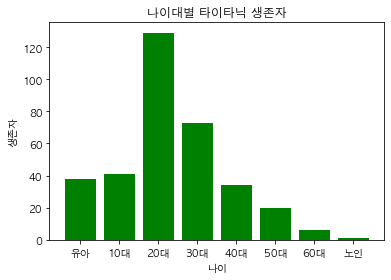

In [420]:
plt.bar(df_titanic_fillna_age_survived_r.index,
       df_titanic_fillna_age_survived_r,
       color='green')
plt.title('나이대별 타이타닉 생존자')
plt.xlabel('나이')
plt.ylabel('생존자')
plt.show()

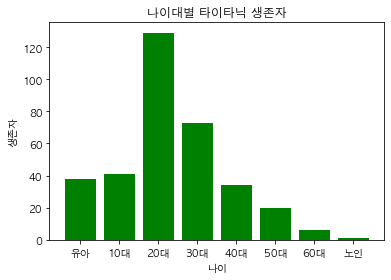

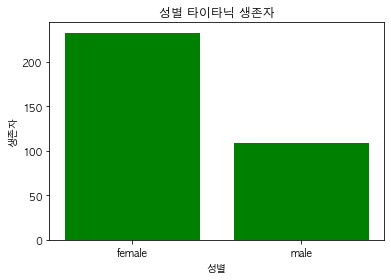

In [421]:
df_titanic_fillna_sex_survived = df_titanic_fillna.groupby('Sex')['Survived'].sum()

plt.bar(df_titanic_fillna_sex_survived.index,
       df_titanic_fillna_sex_survived,
       color='green')
plt.title('성별 타이타닉 생존자')
plt.xlabel('성별')
plt.ylabel('생존자')
plt.show()

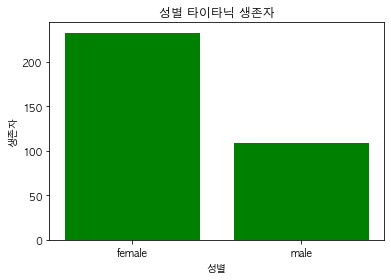

### numpy

In [422]:
#실습1
x = [i for i in range(1, 10)]
y = [i*10 for i in x]

In [423]:
x_33 = np.array(x).reshape(3,-1)
y_33 = np.array(y).reshape(3,-1)

In [424]:
x_33 + y_33

array([[11, 22, 33],
       [44, 55, 66],
       [77, 88, 99]])

In [425]:
np.dot(x_33, y_33)

array([[ 300,  360,  420],
       [ 660,  810,  960],
       [1020, 1260, 1500]])

In [426]:
# 실습 2
np.linspace(1, 20, 30) + 10

array([11.        , 11.65517241, 12.31034483, 12.96551724, 13.62068966,
       14.27586207, 14.93103448, 15.5862069 , 16.24137931, 16.89655172,
       17.55172414, 18.20689655, 18.86206897, 19.51724138, 20.17241379,
       20.82758621, 21.48275862, 22.13793103, 22.79310345, 23.44827586,
       24.10344828, 24.75862069, 25.4137931 , 26.06896552, 26.72413793,
       27.37931034, 28.03448276, 28.68965517, 29.34482759, 30.        ])

In [431]:
# 실습 3
arr3 = np.random.randint(1, 100, size=(2, 10, 10))
arr3

array([[[32, 80, 97, 72, 83, 57, 29, 71,  2, 80],
        [18, 19, 40, 27, 99, 90, 54, 55, 95,  7],
        [63, 25, 44, 37, 22, 81, 87, 18, 63, 33],
        [69, 45, 72, 75, 73,  5, 32, 75, 23, 26],
        [29, 68,  9, 26,  4, 98,  9, 75, 13,  6],
        [91, 25, 65, 60, 85,  8, 25, 24, 96, 53],
        [85, 12, 98, 22, 22, 43, 47, 45, 35, 25],
        [26, 92, 30, 20, 97, 50, 51, 95, 45,  3],
        [75, 91,  8, 66, 51, 28, 33, 64, 84, 53],
        [98, 91, 38, 54, 82, 10, 28, 22, 14, 77]],

       [[60,  2, 11, 50, 56, 69, 87, 51,  1, 62],
        [13, 66,  5, 93, 56, 47,  3, 90, 36, 39],
        [65, 30, 58, 42, 82, 52,  7, 59, 93, 26],
        [91, 31, 38, 16, 76, 74, 36, 97, 21, 39],
        [54, 53, 81, 38, 48, 70, 10, 96, 50,  2],
        [58, 81, 67, 71, 90, 31, 47, 20, 59,  2],
        [75, 27, 83, 87, 83, 87, 63, 83, 87, 51],
        [63, 26, 95, 74, 54, 72, 79, 23, 77, 38],
        [29, 43, 28, 39, 52, 32,  5, 59, 88,  3],
        [ 9, 53, 62,  9, 94, 54, 49, 35, 79, 88]

In [432]:
arr3[arr3 < 50] = 2
arr3[arr3 >= 50] = 1

In [433]:
arr3[1, 5:, 5:]

array([[2, 2, 2, 1, 2],
       [1, 1, 1, 1, 1],
       [1, 1, 2, 1, 2],
       [2, 2, 1, 1, 2],
       [1, 2, 2, 1, 1]])